In [11]:
from pandas import DataFrame, read_csv
from tqdm import tqdm

games_df = read_csv("./data/12-16-processed.csv")
games_df = games_df.dropna()

from sklearn.model_selection import train_test_split

feature_cols = ["PL5G", "OL5G", "PS", "OS", "PWR", "OWR", "AWR", "PNG", "ONG"]

X = games_df[feature_cols]
y = games_df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10000, max_depth=8)

forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.9316196023806509


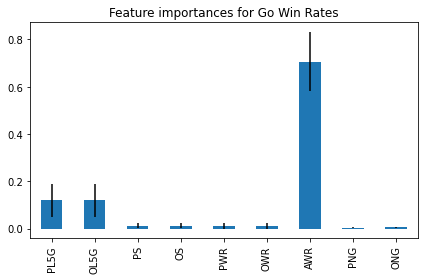

In [12]:
from matplotlib import pyplot
from numpy import std
from pandas import Series

std = std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = Series(forest.feature_importances_, index=feature_cols)

fig, ax = pyplot.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances for Go Win Rates")
fig.tight_layout()

In [13]:
metrics.confusion_matrix(y_test, y_pred)

array([[3707,  282],
       [ 258, 3650]])

In [33]:
count = 0
for i, prediction, label in zip(X_test.iterrows(), y_pred, y_test):
    if prediction != label and not 0.4 <= i[1].AWR <= 0.6:
        count +=1 

count

196

In [10]:
rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[500,1000],
    "max_depth":[2,4,8,16,32,None]
}

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(X_train, y_train)

KeyboardInterrupt: 

In [6]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

display(cv)

Best parameters are: {'max_depth': 8, 'n_estimators': 50}


0.871 + or -0.032 for the {'max_depth': 2, 'n_estimators': 5}
0.89 + or -0.014 for the {'max_depth': 2, 'n_estimators': 10}
0.906 + or -0.009 for the {'max_depth': 2, 'n_estimators': 50}
0.912 + or -0.004 for the {'max_depth': 2, 'n_estimators': 100}
0.911 + or -0.004 for the {'max_depth': 2, 'n_estimators': 250}
0.913 + or -0.01 for the {'max_depth': 4, 'n_estimators': 5}
0.921 + or -0.004 for the {'max_depth': 4, 'n_estimators': 10}
0.927 + or -0.003 for the {'max_depth': 4, 'n_estimators': 50}
0.929 + or -0.002 for the {'max_depth': 4, 'n_estimators': 100}
0.929 + or -0.003 for the {'max_depth': 4, 'n_estimators': 250}
0.93 + or -0.002 for the {'max_depth': 8, 'n_estimators': 5}
0.931 + or -0.001 for the {'max_depth': 8, 'n_estimators': 10}
0.932 + or -0.002 for the {'max_depth': 8, 'n_estimators': 50}
0.931 + or -0.002 for the {'max_depth': 8, 'n_estimators': 100}
0.931 + or -0.001 for the {'max_depth': 8, 'n_estimators': 

In [7]:
forest = RandomForestClassifier(n_estimators=50, max_depth=8)

forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.9360516651893124


In [8]:
metrics.confusion_matrix(y_test, y_pred)

array([[3709,  246],
       [ 259, 3683]])

In [4]:
from pandas import DataFrame, read_csv

games_df = read_csv("./data/12-16-processed.csv")
games_df = games_df.dropna()

from sklearn.model_selection import train_test_split

feature_cols = [
    "PL5G",
    "OL5G",
    "PS",
    "OS",
    "PWR",
    "OWR",
    "AWR",
]

X = games_df[feature_cols]
y = games_df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

from sklearn import metrics, svm

machine = svm.SVC()

machine.fit(X_train, y_train)
y_pred = machine.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.9369380777510447
